# Lab 1 Evaluation

In [7]:
from utils import load_from_csv
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
#Split dataset 80% training; 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=1, test_size = 0.2, train_size=0.80)

Names, Surnames, and Group : 
 - Jose Eduardo Garnica Aza TD2
 - Johan Sebastián Suarez Sepulveda TD2

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [8]:
from sklearn import tree
from matplotlib import pyplot as plt

clf0 = tree.DecisionTreeClassifier(splitter="best", max_depth=None, min_samples_leaf=1)
clf1 = tree.DecisionTreeClassifier(splitter="best", max_depth=3, min_samples_leaf=5)
clf2 = tree.DecisionTreeClassifier(splitter="best", max_depth=6, min_samples_leaf=3, criterion="log_loss")
clf3 = tree.DecisionTreeClassifier(splitter="random", max_depth=2, min_samples_leaf=1, )
clf4 = tree.DecisionTreeClassifier(splitter="random", max_depth=8, min_samples_leaf=5)
clf5 = tree.DecisionTreeClassifier(splitter="best", max_depth=5, min_samples_leaf=2)

Q2: Train a decision tree for each of the previous configurations on the full dataset

In [9]:
clf0 = clf0.fit(x_train, y_train)
clf1 = clf1.fit(x_train, y_train)
clf2 = clf2.fit(x_train, y_train)
clf3 = clf3.fit(x_train, y_train)
clf4 = clf4.fit(x_train, y_train)
clf5 = clf5.fit(x_train, y_train)

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

In [10]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf0, x_test, y_test, cv=5))
print(cross_val_score(clf1, x_test, y_test, cv=5))



[0.65402844 0.63033175 0.66824645 0.60189573 0.66350711]
[0.65402844 0.67298578 0.67298578 0.60189573 0.66824645]


Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting 

- With the confusion matrix we can see, if it exist and overfirting or underfirtting, with it, we can know if it's necessary to add new cararteristics of the sample set or in case contrary if exist overfirtting we can realize one observation for determinate the cararteristics that are missing, and we can agregate for have a good accuarency, the accuarency tells us if it exist one problem of underfitting and overfitting

Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice)

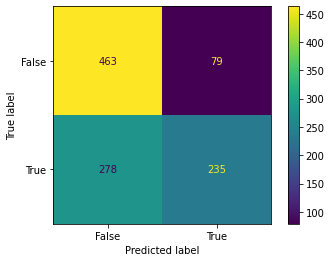

In [13]:
# As we can see the precision and accuracy with respect to testing using 5-cross validation, 
# the second tree presents better real performance with respect to the given training samples,
# therefore it is important to make an analysis using the confusion matrix for this decision tree.

from sklearn import metrics
import matplotlib.pyplot as plt

prediction1=clf1.predict(x_test)
confusion_matrix1 = metrics.confusion_matrix(y_test, prediction1)
confusion_matrix1
cm_display0 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm_display0.plot()
plt.show()



Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate

In [15]:
acc1=(confusion_matrix1[0,0]+confusion_matrix1[1,1])/(confusion_matrix1[0,0]+confusion_matrix1[0,1]+confusion_matrix1[1,0]+confusion_matrix1[1,1])
acc1

# fairness= (True_True+False_Predictes)/All_Data
# In this way it is possible to see how the model behaves with respect to the sample in real terms of prediction.

0.6616113744075829